In [132]:
!pip install spacy
!python -m spacy download es_core_news_md

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [133]:
import pandas as pd
import numpy as np
import pickle

In [134]:
df_normas_bo = pd.read_excel("normas-autonomas-de-bolivia.xlsx")

In [135]:
df_normas_bo.columns

Index(['INDEX', 'ARCHIVO', 'NIVEL', 'OBJETO', 'NROTOPIC', 'GRUPO',
       'COMPETENCIA', 'COMP'],
      dtype='object')

In [136]:
df_normas_bo["OBJETO"][0]

'Declarar prioridad departamental el suministro de gas natural a las 16 provincias del departamento de Oruro'

In [137]:
df_normas_bo

,INDEX,ARCHIVO,NIVEL,OBJETO,NROTOPIC,GRUPO,COMPETENCIA,COMP
0,1,6916.pdf,Departamental,Declarar prioridad departamental el suministro...,16,Privativas Central,18. Hidrocarburos.,18. Hidrocarburos. - Privativas Central
1,2,6915.pdf,Departamental,Controlar y regular el transporte de minerales...,19,Privativas Central,21. Codificación sustantiva y adjetiva en mate...,21. Codificación sustantiva y adjetiva en mate...
2,3,6921.pdf,Departamental,"Crear el ""Comité Departamental Interinstitucio...",19,Privativas Central,21. Codificación sustantiva y adjetiva en mate...,21. Codificación sustantiva y adjetiva en mate...
3,4,5594.pdf,Municipal,LEY MUNICIPAL ELABORACIÓN PARTICIPATIVA DEL AN...,22,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,01. Elaborar su Carta Orgánica Municipal de ac...
4,5,5966.pdf,Municipal,LEY MUNICIPAL DE APROBACIÓN DEL PROYECTO DE CA...,22,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,01. Elaborar su Carta Orgánica Municipal de ac...
...,...,...,...,...,...,...,...,...
2618,2619,1558.pdf,Departamental,CREACIÓN Y CONSTRUCCIÓN DE CENTROS TERAPÉUTICO...,274,Exclusivas Departamental,02. Planificar y promover el desarrollo humano...,02. Planificar y promover el desarrollo humano...
2619,2620,1580.pdf,Departamental,DE CREACIÓN DEL FONDO ROTATORIO PARA ESPECIALI...,274,Exclusivas Departamental,02. Planificar y promover el desarrollo humano...,02. Planificar y promover el desarrollo humano...
2620,2621,2348.pdf,Departamental,LEY DE IMPLEMENTACIÓN Y FUNCIONAMIENTO DE COME...,274,Exclusivas Departamental,02. Planificar y promover el desarrollo humano...,02. Planificar y promover el desarrollo humano...
2621,2622,2434.pdf,Departamental,QUE APRUEBA LA DONACIÓN DE RECUROS ECONÓMICOS ...,274,Exclusivas Departamental,02. Planificar y promover el desarrollo humano...,02. Planificar y promover el desarrollo humano...


## PREPROCESAMIENTO DEL DATASET

## eliminando NaNs

In [138]:
df_normas_bo["OBJETO"][0]

'Declarar prioridad departamental el suministro de gas natural a las 16 provincias del departamento de Oruro'

In [139]:
df_normas_bo = df_normas_bo[pd.notnull(df_normas_bo['GRUPO'])]
df_normas_bo

,INDEX,ARCHIVO,NIVEL,OBJETO,NROTOPIC,GRUPO,COMPETENCIA,COMP
0,1,6916.pdf,Departamental,Declarar prioridad departamental el suministro...,16,Privativas Central,18. Hidrocarburos.,18. Hidrocarburos. - Privativas Central
1,2,6915.pdf,Departamental,Controlar y regular el transporte de minerales...,19,Privativas Central,21. Codificación sustantiva y adjetiva en mate...,21. Codificación sustantiva y adjetiva en mate...
2,3,6921.pdf,Departamental,"Crear el ""Comité Departamental Interinstitucio...",19,Privativas Central,21. Codificación sustantiva y adjetiva en mate...,21. Codificación sustantiva y adjetiva en mate...
3,4,5594.pdf,Municipal,LEY MUNICIPAL ELABORACIÓN PARTICIPATIVA DEL AN...,22,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,01. Elaborar su Carta Orgánica Municipal de ac...
4,5,5966.pdf,Municipal,LEY MUNICIPAL DE APROBACIÓN DEL PROYECTO DE CA...,22,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,01. Elaborar su Carta Orgánica Municipal de ac...
...,...,...,...,...,...,...,...,...
2618,2619,1558.pdf,Departamental,CREACIÓN Y CONSTRUCCIÓN DE CENTROS TERAPÉUTICO...,274,Exclusivas Departamental,02. Planificar y promover el desarrollo humano...,02. Planificar y promover el desarrollo humano...
2619,2620,1580.pdf,Departamental,DE CREACIÓN DEL FONDO ROTATORIO PARA ESPECIALI...,274,Exclusivas Departamental,02. Planificar y promover el desarrollo humano...,02. Planificar y promover el desarrollo humano...
2620,2621,2348.pdf,Departamental,LEY DE IMPLEMENTACIÓN Y FUNCIONAMIENTO DE COME...,274,Exclusivas Departamental,02. Planificar y promover el desarrollo humano...,02. Planificar y promover el desarrollo humano...
2621,2622,2434.pdf,Departamental,QUE APRUEBA LA DONACIÓN DE RECUROS ECONÓMICOS ...,274,Exclusivas Departamental,02. Planificar y promover el desarrollo humano...,02. Planificar y promover el desarrollo humano...


## tokenizacion

In [140]:
!python -m spacy download es_core_news_md

Defaulting to user installation because normal site-packages is not writeable
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [141]:
# !python -m spacy --help

In [142]:
df_normas_bo.head()

,INDEX,ARCHIVO,NIVEL,OBJETO,NROTOPIC,GRUPO,COMPETENCIA,COMP
0,1,6916.pdf,Departamental,Declarar prioridad departamental el suministro...,16,Privativas Central,18. Hidrocarburos.,18. Hidrocarburos. - Privativas Central
1,2,6915.pdf,Departamental,Controlar y regular el transporte de minerales...,19,Privativas Central,21. Codificación sustantiva y adjetiva en mate...,21. Codificación sustantiva y adjetiva en mate...
2,3,6921.pdf,Departamental,"Crear el ""Comité Departamental Interinstitucio...",19,Privativas Central,21. Codificación sustantiva y adjetiva en mate...,21. Codificación sustantiva y adjetiva en mate...
3,4,5594.pdf,Municipal,LEY MUNICIPAL ELABORACIÓN PARTICIPATIVA DEL AN...,22,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,01. Elaborar su Carta Orgánica Municipal de ac...
4,5,5966.pdf,Municipal,LEY MUNICIPAL DE APROBACIÓN DEL PROYECTO DE CA...,22,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,01. Elaborar su Carta Orgánica Municipal de ac...


In [143]:
df_normas_bo["OBJETO"][0]

'Declarar prioridad departamental el suministro de gas natural a las 16 provincias del departamento de Oruro'

In [144]:
df_normas_bo.shape

(2623, 8)

In [145]:
import spacy
nlp = spacy.load('es_core_news_md')

In [146]:
from nltk.tokenize import TweetTokenizer

df_normas = pd.DataFrame({"ARCHIVO":[],"OBJETO":[],"NROTOPIC":[], "GRUPO":[], "COMPETENCIA":[], "TOKENIZADO":[]})

k = 100

for i in range(0,df_normas_bo.shape[0]):
    token_1 = TweetTokenizer()
    data = df_normas_bo["OBJETO"][i]
    lista = token_1.tokenize(data)
 
    for n,word in enumerate(lista):
        if(sum(nlp.vocab[word].vector)==0.0):
            lista.pop(n)
            
    texto = ""
    for word in lista:
        texto = texto + word + " "
        
    doc = nlp(texto)
    text=[token.orth_ for token in doc if len(token) > 2 and not (token.is_oov or token.is_stop) and not (token.text=="ley")]
    text = [t.lower() for t in text if t.isalpha()]
    
    file = df_normas_bo["ARCHIVO"][i]
    objeto = df_normas_bo["OBJETO"][i]
    nrotopic = df_normas_bo["NROTOPIC"][i]
    grupo = df_normas_bo["GRUPO"][i]
    competencia = df_normas_bo["COMPETENCIA"][i]
    
    array = np.array([file, objeto, nrotopic, grupo, competencia, text], dtype=object)
    df_normas.loc[len(df_normas)]=array
    
    if (k == i):
        print("------archivo-",i,"------")
        k+=100
        

------archivo- 100 ------
------archivo- 200 ------
------archivo- 300 ------
------archivo- 400 ------
------archivo- 500 ------
------archivo- 600 ------
------archivo- 700 ------
------archivo- 800 ------
------archivo- 900 ------
------archivo- 1000 ------
------archivo- 1100 ------
------archivo- 1200 ------
------archivo- 1300 ------
------archivo- 1400 ------
------archivo- 1500 ------
------archivo- 1600 ------
------archivo- 1700 ------
------archivo- 1800 ------
------archivo- 1900 ------
------archivo- 2000 ------
------archivo- 2100 ------
------archivo- 2200 ------
------archivo- 2300 ------
------archivo- 2400 ------
------archivo- 2500 ------
------archivo- 2600 ------


In [147]:
df_normas.head(10)

,ARCHIVO,OBJETO,NROTOPIC,GRUPO,COMPETENCIA,TOKENIZADO
0,6916.pdf,Declarar prioridad departamental el suministro...,16.0,Privativas Central,18. Hidrocarburos.,"[declarar, prioridad, departamental, suministr..."
1,6915.pdf,Controlar y regular el transporte de minerales...,19.0,Privativas Central,21. Codificación sustantiva y adjetiva en mate...,"[controlar, regular, transporte, minerales, me..."
2,6921.pdf,"Crear el ""Comité Departamental Interinstitucio...",19.0,Privativas Central,21. Codificación sustantiva y adjetiva en mate...,"[crear, comité, departamental, interinstitucio..."
3,5594.pdf,LEY MUNICIPAL ELABORACIÓN PARTICIPATIVA DEL AN...,22.0,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,"[ley, municipal, elaboración, participativa, a..."
4,5966.pdf,LEY MUNICIPAL DE APROBACIÓN DEL PROYECTO DE CA...,22.0,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,"[ley, municipal, aprobación, proyecto, carta, ..."
5,6344.pdf,LEY DE APROBACIÓN DE LA CARTA ORGÁNICA MUNICIP...,22.0,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,"[ley, aprobación, carta, orgánica, municipal]"
6,6592.pdf,LEY MUNICIPAL DE APROBACIÓN DEL PROYECTO DE CA...,22.0,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,"[ley, municipal, aprobación, proyecto, carta, ..."
7,7421.pdf,"LEY MUNICIPAL DE ""AJUSTE Y ADECUACION DEL PROY...",22.0,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,"[ley, municipal, ajuste, proyecto, carta, orga..."
8,7478.pdf,LEY DE APROBACION DEL PROYECTO DE CARTA ORGANI...,22.0,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,"[ley, aprobacion, proyecto, carta, organica, m..."
9,8067.pdf,LEY MODIFICATORIA A LA LEY MUNICIPAL DE ELABOR...,22.0,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,"[ley, ley, municipal, elaboracion, participati..."


In [148]:
df_normas["TOKENIZADO"][0]

['declarar',
 'prioridad',
 'departamental',
 'suministro',
 'gas',
 'natural',
 'provincias',
 'departamento',
 'oruro']

In [149]:
df_normas_bo["OBJETO"][0]

'Declarar prioridad departamental el suministro de gas natural a las 16 provincias del departamento de Oruro'

## lematizacion

In [150]:
df_lemmatized = pd.DataFrame({"ARCHIVO":[],"OBJETO":[],"NROTOPIC":[], "GRUPO":[], "COMPETENCIA":[], "LEMATIZED":[]})

k = 100
for i in range(0, df_normas.shape[0]):
    data = df_normas["TOKENIZADO"][i]
    texto = ""
    for word in data:
        texto = texto + word + " "
    
    doc = nlp(texto)
    text = [token.lemma_ for token in doc]
       
    file = df_normas_bo["ARCHIVO"][i]
    objeto = df_normas_bo["OBJETO"][i]
    nrotopic = df_normas_bo["NROTOPIC"][i]
    grupo = df_normas_bo["GRUPO"][i]
    competencia = df_normas_bo["COMPETENCIA"][i]
    
    array = np.array([file, objeto, nrotopic, grupo, competencia, text], dtype=object)
    df_lemmatized.loc[len(df_lemmatized)]=array
    
    if (k == i):
        print("------archivo-", i,"-------")
        k+=100


------archivo- 100 -------
------archivo- 200 -------
------archivo- 300 -------
------archivo- 400 -------
------archivo- 500 -------
------archivo- 600 -------
------archivo- 700 -------
------archivo- 800 -------
------archivo- 900 -------
------archivo- 1000 -------
------archivo- 1100 -------
------archivo- 1200 -------
------archivo- 1300 -------
------archivo- 1400 -------
------archivo- 1500 -------
------archivo- 1600 -------
------archivo- 1700 -------
------archivo- 1800 -------
------archivo- 1900 -------
------archivo- 2000 -------
------archivo- 2100 -------
------archivo- 2200 -------
------archivo- 2300 -------
------archivo- 2400 -------
------archivo- 2500 -------
------archivo- 2600 -------


In [151]:
df_lemmatized

,ARCHIVO,OBJETO,NROTOPIC,GRUPO,COMPETENCIA,LEMATIZED
0,6916.pdf,Declarar prioridad departamental el suministro...,16.0,Privativas Central,18. Hidrocarburos.,"[declarar, prioridad, departamental, suministr..."
1,6915.pdf,Controlar y regular el transporte de minerales...,19.0,Privativas Central,21. Codificación sustantiva y adjetiva en mate...,"[controlar, regular, transporte, mineral, metá..."
2,6921.pdf,"Crear el ""Comité Departamental Interinstitucio...",19.0,Privativas Central,21. Codificación sustantiva y adjetiva en mate...,"[crear, comité, departamental, interinstitucio..."
3,5594.pdf,LEY MUNICIPAL ELABORACIÓN PARTICIPATIVA DEL AN...,22.0,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,"[ley, municipal, elaboración, participativo, a..."
4,5966.pdf,LEY MUNICIPAL DE APROBACIÓN DEL PROYECTO DE CA...,22.0,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,"[ley, municipal, aprobación, proyecto, carto, ..."
...,...,...,...,...,...,...
2618,1558.pdf,CREACIÓN Y CONSTRUCCIÓN DE CENTROS TERAPÉUTICO...,274.0,Exclusivas Departamental,02. Planificar y promover el desarrollo humano...,"[creación, construcción, centro, asistencial, ..."
2619,1580.pdf,DE CREACIÓN DEL FONDO ROTATORIO PARA ESPECIALI...,274.0,Exclusivas Departamental,02. Planificar y promover el desarrollo humano...,"[creación, fondo, especialidad, médico]"
2620,2348.pdf,LEY DE IMPLEMENTACIÓN Y FUNCIONAMIENTO DE COME...,274.0,Exclusivas Departamental,02. Planificar y promover el desarrollo humano...,"[ley, implementación, funcionamiento, comedor,..."
2621,2434.pdf,QUE APRUEBA LA DONACIÓN DE RECUROS ECONÓMICOS ...,274.0,Exclusivas Departamental,02. Planificar y promover el desarrollo humano...,"[aprobar, donación, económico, población, naci..."


In [152]:
''' ['declarar',
 'prioridad',
 'departamental',
 'suministro',
 'gas',
 'natural',
 'provincias',
 'departamento',
 'oruro'] '''

" ['declarar',\n 'prioridad',\n 'departamental',\n 'suministro',\n 'gas',\n 'natural',\n 'provincias',\n 'departamento',\n 'oruro'] "

In [153]:
df_lemmatized["LEMATIZED"][0]

['declarar',
 'prioridad',
 'departamental',
 'suministro',
 'gas',
 'natural',
 'provincia',
 'departamento',
 'oruro']

In [154]:
# export pickle
df_lemmatized.to_pickle("df_lemmatized.pkl")

## Normalizacion

In [155]:
import re
p = re.compile(r'\á')
df_lemmatized["LEMATIZED"] = df_lemmatized["LEMATIZED"].apply(lambda x: [re.sub(p, 'a', word) for word in x])
p = re.compile(r'\é')
df_lemmatized["LEMATIZED"] = df_lemmatized["LEMATIZED"].apply(lambda x: [re.sub(p, 'e', word) for word in x])
p = re.compile(r'\í')
df_lemmatized["LEMATIZED"] = df_lemmatized["LEMATIZED"].apply(lambda x: [re.sub(p, 'i', word) for word in x])
p = re.compile(r'\ó')
df_lemmatized["LEMATIZED"] = df_lemmatized["LEMATIZED"].apply(lambda x: [re.sub(p, 'o', word) for word in x])
p = re.compile(r'\ú')
df_lemmatized["LEMATIZED"] = df_lemmatized["LEMATIZED"].apply(lambda x: [re.sub(p, 'u', word) for word in x])


In [156]:
df_lemmatized.head(10)

,ARCHIVO,OBJETO,NROTOPIC,GRUPO,COMPETENCIA,LEMATIZED
0,6916.pdf,Declarar prioridad departamental el suministro...,16.0,Privativas Central,18. Hidrocarburos.,"[declarar, prioridad, departamental, suministr..."
1,6915.pdf,Controlar y regular el transporte de minerales...,19.0,Privativas Central,21. Codificación sustantiva y adjetiva en mate...,"[controlar, regular, transporte, mineral, meta..."
2,6921.pdf,"Crear el ""Comité Departamental Interinstitucio...",19.0,Privativas Central,21. Codificación sustantiva y adjetiva en mate...,"[crear, comite, departamental, interinstitucio..."
3,5594.pdf,LEY MUNICIPAL ELABORACIÓN PARTICIPATIVA DEL AN...,22.0,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,"[ley, municipal, elaboracion, participativo, a..."
4,5966.pdf,LEY MUNICIPAL DE APROBACIÓN DEL PROYECTO DE CA...,22.0,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,"[ley, municipal, aprobacion, proyecto, carto, ..."
5,6344.pdf,LEY DE APROBACIÓN DE LA CARTA ORGÁNICA MUNICIP...,22.0,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,"[ley, aprobacion, carto, organico, municipal]"
6,6592.pdf,LEY MUNICIPAL DE APROBACIÓN DEL PROYECTO DE CA...,22.0,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,"[ley, municipal, aprobacion, proyecto, carto, ..."
7,7421.pdf,"LEY MUNICIPAL DE ""AJUSTE Y ADECUACION DEL PROY...",22.0,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,"[ley, municipal, ajustar, proyecto, carto, org..."
8,7478.pdf,LEY DE APROBACION DEL PROYECTO DE CARTA ORGANI...,22.0,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,"[ley, aprobacion, proyecto, carto, organico, m..."
9,8067.pdf,LEY MODIFICATORIA A LA LEY MUNICIPAL DE ELABOR...,22.0,Exclusivas Municipal,01. Elaborar su Carta Orgánica Municipal de ac...,"[ley, ley, municipal, elaboracion, participati..."


In [157]:
def to_list(normas):
    normas_1= normas.LEMATIZED.values.tolist()
    return normas_1
normas = to_list(df_lemmatized)

print(normas[0])

['declarar', 'prioridad', 'departamental', 'suministro', 'gas', 'natural', 'provincia', 'departamento', 'oruro']


In [158]:
from collections import Counter

vocabulario= Counter()
for linea in normas:
    for palabra in linea:
        vocabulario[palabra] += 1
        
palabras_poco_frecuentes = [palabra for palabra in vocabulario.keys() if vocabulario[palabra] == 1]

vocabulario = sorted(vocabulario, key = vocabulario.get, reverse=True)
word_to_id = { palabra:i for i,palabra in enumerate(vocabulario, 1) } # Se crea un diccionario donde a cada palabra se le asigna un id

print(word_to_id)

{'ley': 1, 'municipal': 2, 'departamental': 3, 'aprobar': 4, 'gobierno': 5, 'autonomo': 6, 'modificacion': 7, 'convenio': 8, 'proyecto': 9, 'presupuestario': 10, 'aprobacion': 11, 'construccion': 12, 'gestion': 13, 'departamento': 14, 'presupuesto': 15, 'cochabambo': 16, 'interinstitucional': 17, 'municipio': 18, 'nro': 19, 'declaratorio': 20, 'programa': 21, 'ratificar': 22, 'declarar': 23, 'anual': 24, 'recurso': 25, 'patrimonio': 26, 'cultural': 27, 'ejecucion': 28, 'poa': 29, 'operativo': 30, 'declaracion': 31, 'santo': 32, 'transferencio': 33, 'san': 34, 'publico': 35, 'plan': 36, 'inversion': 37, 'cruz': 38, 'paz': 39, 'desarrollo': 40, 'provincia': 41, 'gad': 42, 'camino': 43, 'propiedad': 44, 'suscrito': 45, 'prioridad': 46, 'autonomico': 47, 'inscripcion': 48, 'servicio': 49, 'incorporacion': 50, 'oruro': 51, 'sistema': 52, 'creacion': 53, 'salarial': 54, 'centro': 55, 'suscripcion': 56, 'historico': 57, 'salud': 58, 'favor': 59, 'concurrente': 60, 'escala': 61, 'necesidad': 6

In [159]:
print('Tamaño del vocabulario del conjunto de datos: ', str(len(vocabulario))) 

print('Palabras que solo aparecen una vez: ', str(len(palabras_poco_frecuentes)))

Tamaño del vocabulario del conjunto de datos:  2008
Palabras que solo aparecen una vez:  802


## Condificacion de las palabra de la lista de lematizados con su respectivo id

In [160]:
def encoded_words(lista):
    encoded_normas= [[word_to_id[palabra] for palabra in linea if palabra in vocabulario] for linea in lista] # Se codifican las palabras
    return encoded_normas

encoded_normas= encoded_words(normas) # Se codifican las palabras
maximo = 0
for n,lista in enumerate(encoded_normas):
    if(maximo<=len(lista)):
        maximo = len(lista)
        lista_1 = lista
        indice = n

print(maximo)
print(lista_1[7])
print(indice)

for i in range(10):
    print(encoded_normas[i])
    print(normas[i])


53
326
1285
[23, 46, 3, 873, 583, 132, 41, 14, 51]
['declarar', 'prioridad', 'departamental', 'suministro', 'gas', 'natural', 'provincia', 'departamento', 'oruro']
[1207, 280, 149, 699, 874, 874, 269, 369, 875, 14, 51]
['controlar', 'regular', 'transporte', 'mineral', 'metalico', 'metalico', 'comercializacion', 'interno', 'exportacion', 'departamento', 'oruro']
[876, 514, 3, 17, 452, 233, 1208, 877, 281, 1209]
['crear', 'comite', 'departamental', 'interinstitucional', 'politica', 'minero', 'definir', 'integrante', 'establecer', 'funcion']
[1, 2, 207, 515, 332, 234, 122]
['ley', 'municipal', 'elaboracion', 'participativo', 'anteproyecto', 'carto', 'organico']
[1, 2, 11, 9, 234, 122]
['ley', 'municipal', 'aprobacion', 'proyecto', 'carto', 'organico']
[1, 11, 234, 122, 2]
['ley', 'aprobacion', 'carto', 'organico', 'municipal']
[1, 2, 11, 9, 234, 122, 18, 6]
['ley', 'municipal', 'aprobacion', 'proyecto', 'carto', 'organico', 'municipio', 'autonomo']
[1, 2, 878, 9, 234, 122, 2, 111, 516]
['

### Funcion para redimensionar nuestra lista de lematizados en base al maximo de palabras que tenga uno de las sublistas

In [161]:
# Introduces el largo de la secuencia que deseas para que corte la oracion hasta un determinado largo
def cut_pad(texto, largo_secuencia):
    clean_sequence=[]
    for linea in texto:
        if len(linea)>=largo_secuencia:
            clean_sequence.append(linea[:largo_secuencia])
        else:
            padding=[0]*(largo_secuencia-len(linea))
            clean_sequence.append(padding+linea)
    return clean_sequence

In [162]:
lista_ids = cut_pad(encoded_normas,maximo)  ## 53

maximo

In [163]:
array = np.zeros([df_lemmatized.shape[0],maximo])
array = array.astype("int64")
lista_indices = df_lemmatized.index.values.astype("int")

In [164]:
# generando una nueva matriz en base al array anterior
i = 0
for lista in lista_ids[0:df_lemmatized.shape[0]]:
    for n,_id in enumerate(lista):
        array[i][n] = _id
    i += 1
    
data_frame = pd.DataFrame(data = array, index=lista_indices)
data_frame

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0,0,0,0,0,0,0,0,0,0,...,0,23,46,3,873,583,132,41,14,51
1,0,0,0,0,0,0,0,0,0,0,...,280,149,699,874,874,269,369,875,14,51
2,0,0,0,0,0,0,0,0,0,0,...,876,514,3,17,452,233,1208,877,281,1209
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,207,515,332,234,122
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,11,9,234,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,0,0,0,0,0,0,0,0,0,0,...,0,0,53,12,55,1188,365,136,2007,2008
2619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,53,109,502,363
2620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,112,174,1187,1184,136
2621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,297,67,238,289,403,565


In [165]:
X = data_frame
Y = df_lemmatized["NROTOPIC"].values.astype("int64")
print(X.shape,Y.shape)

(2623, 53) (2623,)


## ONE HOT ENCODING

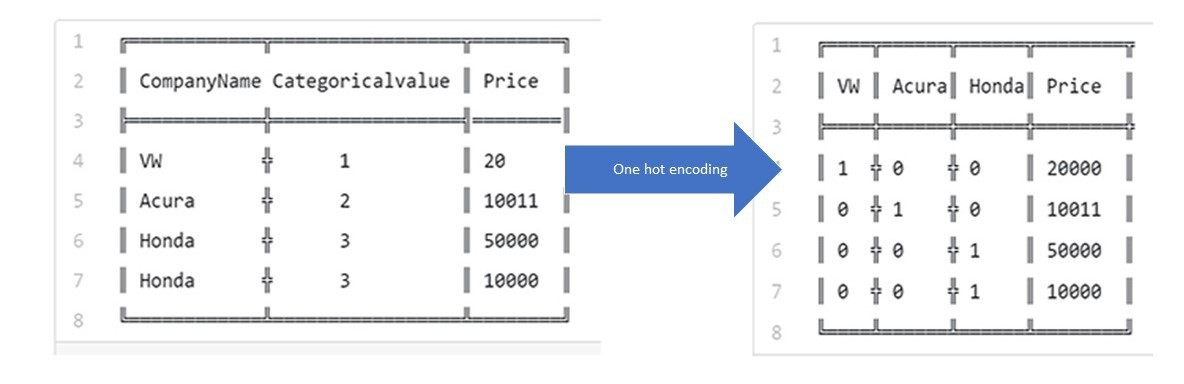

In [166]:
from IPython.display import Image
Image("./onehotencoding.jpeg")

In [167]:
df_normas_bo["NROTOPIC"].unique()
# df_normas_bo.columns

array([ 16,  19,  22,  23,  25,  26,  27,  28,  29,  30,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  45,  46,  47,  48,
        50,  51,  52,  53,  54,  55,  56,  58,  59,  60,  61,  65,  67,
        70,  72,  73,  92,  93,  94,  95,  97,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 125, 126, 128, 129, 133, 135,
       188, 198, 207, 208, 210, 215, 216, 217, 218, 219, 220, 221, 222,
       225, 228, 229, 230, 233, 235, 237, 238, 239, 242, 244, 245, 248,
       249, 250, 251, 253, 255, 259, 260, 261, 262, 264, 266, 267, 268,
       270, 271, 272, 274])

In [168]:
lista_Y = list(Y)
array_1 = np.zeros([Y.shape[0],275]).astype("int64")
columns = [i for i in range(275)] # 275 topics
data_frame = pd.DataFrame(data = array_1,columns = columns,index = lista_indices)
for i in range(data_frame.shape[0]):
    data_frame[lista_Y[i]][i] = 1

data_frame

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [169]:
# La función get_dummies permite eliminar la primera de las columnas generadas para cada característica codificada para evitar la denominada colinealidad
Y= pd.get_dummies(Y)
print(Y.shape)
Y

(2623, 121)


,16,19,22,23,25,26,27,28,29,30,...,261,262,264,266,267,268,270,271,272,274
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### TRAIN TEST SPLIT

In [170]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2098, 53) (2098, 121)
(525, 53) (525, 121)


In [171]:
X_train
# X_test

# Y_train
# Y_test

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
1308,0,0,0,0,0,0,0,0,0,0,...,212,1,3,4,48,7,10,21,271,933
1095,0,0,0,0,0,0,0,0,0,0,...,0,0,80,122,61,54,13,5,6,3
1945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,23,91,2
705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,53,462,3,770,420
2347,0,0,0,0,0,0,0,0,0,0,...,0,0,4,8,17,94,45,42,16,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,127,244
2448,0,0,0,0,0,0,0,0,0,0,...,193,21,87,226,458,1970,858,162,159,394
1728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,176,199,1,3,19
257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,31,44,2


## LSTM (Long Short Term Memory)

In [183]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import SpatialDropout1D
# fix random seed for reproducibility
np.random.seed(7)

# create the model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(len(word_to_id)+1, embedding_vector_length, input_length=maximo)) ## seria 53
model.add(SpatialDropout1D(0.3))
model.add(LSTM(100,dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(121, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
fitter = model.fit(X_train, Y_train, epochs=300,validation_data=[X_train, Y_train], batch_size=64)

# Final evaluation of the model
scores = fitter.model.evaluate(X_test, Y_test, verbose=0)


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 53, 32)            64288     
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 53, 32)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_14 (Dense)             (None, 121)               12221     
Total params: 129,709
Trainable params: 129,709
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
33/33 [==============================] - 7s 102ms/step - loss: 4.5219 - accuracy: 0.1304 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/300
33/33 [==============================] - 3s 104ms/step - loss: 3.4751 - accur

In [184]:
scores = fitter.model.evaluate(X_test, Y_test, verbose=0)
# print(indices)
prediction = fitter.model.predict(X_test)

In [187]:
# prediction = model.predict_classes(X_test)
# print(prediction)

/home/tonito/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[ 94 107  20  66  64  57 116  64  16   6  94  20  64  94  64  94  64  64
 111 104  41  64  64  66  64  94  84  94   5  94  46  46  64 116  56  57
 116  64  94  64  64  64 116 116  61  57  64  17  64 109  20  46  20 116
  64  20 116  64  64 116  94  25 116  94  64  30  42  64  69  99  20  92
   6  67  64  64  66   3  19  84  64  47  20 104  63  20  64 116  20  69
   6  20 116  94 116  64  57  64  57  41  30  88  55   6  94  64  64  42
  64  13  20 116  20  69 116  57 116  64 107  20 116 116  99 103   5  57
  20  92  88  64  64  88  94  20 116  94  11  33 116  99  60  80  35  35
 116 109 116  64 103   6 107  20  94  88 116 116  94  64  64  68  64  57
  64  30  64 116  94  64  20  19  26  64  94  17  90  20  94  20 103  94
  57  64  94 116  64 116  16  46  88  94  64 104  97  94  94  64  94  46
  99  13  57  20  20  64  64  88   6  64  64  20  35  46  47  19  94  20
 116  64  79  20  92  89  13  64  64  13 116  47  20  64  19  69  41  57
  94  94  41  64  20  13  13  64  24  91 112  94 11